# Stroop effect statistical analysis
=================================================

## Context
In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example <span style="color:red">*RED*</span>, <span style="color:blue">*BLUE*</span>. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example <span style="color:green">*PURPLE*</span>, <span style="color:purple">*ORANGE*</span>. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

## Questions:
1. What is our independent variable? What is our dependent variable?

2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

    Now it’s your chance to try out the Stroop task for yourself. Go to this [link](https://www.google.com/url?q=https://faculty.washington.edu/chudler/java/ready.html&sa=D&ust=1516879737847000&usg=AFQjCNH3bOa8aeB76Jnvkc7G7SHDgWZD1Q), which has a Java-based applet for performing the Stroop task. Record the times that you received on the task (you do not need to submit your times to the site.) Now, download this [dataset](https://www.google.com/url?q=https://drive.google.com/file/d/0B9Yf01UaIbUgQXpYb2NhZ29yX1U/view?usp%3Dsharing&sa=D&ust=1516879737848000&usg=AFQjCNGbCkhawnz0hIjdU6eCpfCuOCIBOQ) which contains results from a number of participants in the task. Each row of the dataset contains the performance for one participant, with the first number their results on the congruent task and the second number their performance on the incongruent task.

3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

---
## 1. Variables
The **independant variable** is the *congruent* or *incongruent* **condition**, controlled by the experiment operator.  
The **dependant variable** is the **time** needed by the subject to name the ink colors from the whole set of words, for a **given condition**.

---
## 2. Hypothesis and statistical test

### Null and alternate hypothesis

The **null hypothesis** may be formulated as: "there is no significant difference in the population average amount of time to state the colors in a congruent or incongruent condition"  
The **alternate hypothesis** may be: "the population average amount of time to state the colors in an incongruent  condition is significantly greater than in a congruent condition"


$$H_0: \mu_i = \mu_c$$
$$H_{alt}: \mu_i \ne \mu_c $$

*Notation*: symbol *mu* stands for the population mean, indices *i* stand for *incongruent* and *c* for *congruent*

### Statistical test
Let's design our statistical as follows:

- the **dependant-samples** are tested on **two conditions**: every participant goes through each condition (*within-subject* test). In other words, the experiment is based on **repetitive measures**.
- the test type is a ***t-test*** since we of course do not have access to the whole population parameters.
- the **critical region** is on the right side of the normal distribution to account for our hypothesis
- the **one/two-tailed** and **level of confidence** will be defined after having displayed the sample results

---
## Stroop data
It took me 22 seconds to complete the first step with congruent colors and 27 seconds for the second one with incongruent colors.  
Let'sl load and display the dataset proposed in introduction:

In [4]:
import os, pandas
project_path = "."
data_path = os.path.join(project_path, 'stroopdata.csv')
df = pandas.read_csv(data_path)
df

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


My own scores seem quite long! Anyway, let's enter the database...

---
## 3. Descriptive statistics
Let's be lazy and use pandas module to describe the dataset:

In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Let's interpret some numbers computed by panda and report them in a table:

|Measure |Description|Congruent|Incongruent|
|--------|-----------|---------|-----------|
|n|sample size|24|24|
|xbar|sample average|14.05|22.02|
|sd|sample standard deviation|3.56|4.80|

The difference of the two means gives us a point estimate of what could be the impact of Stroop effect on the entire population.  
The standard deviations show that the Stroop scores spread out a bit more with *incongruent* condition. 

---
## 4. Visualization

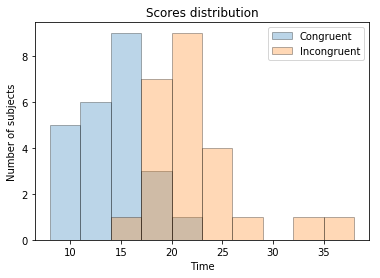

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
labels = ('Congruent', 'Incongruent')
for serie, label in zip([df[labels[0]],df[labels[1]]], labels):
          serie.plot.hist(label=label, bins=np.arange(8,40,3), alpha=0.3,edgecolor='k')
plt.xlabel('Time')
plt.ylabel('Number of subjects')
plt.title('Scores distribution')
l = plt.legend()

The distributions shows different shapes:
- the *congruent* distribution in blue is slightly skewed (positively)
- the *incongruent* dataset in orange is normally distributed with two outliers at the right most end of it

Let's make some guess as an explanation:
- some participants may have understood that they would be much faster by directly reading the words than even trying to decode the ink colors! it would explain the skewed shape of the blue histogram
- all participants have been disturbed by the Stroop effect which led to the almost normally-distributed orange histogram, even if two of them seemed to be more affected and answered with a bigger elapsed time.

---
## 5. Statistical Test

Let's compute the statistics from the scores difference since we want to test our hypothesis based on difference of means:

In [26]:
df_diff = df['Incongruent'] - df['Congruent']

In [44]:
n       = df_diff.count()
xbar    = df_diff.mean()
sd      = df_diff.std()
se      = sd / (n ** 0.5)
t_stat  = xbar / se
cohen_d = xbar / sd
for var in ('n', 'xbar', 'sd', 'se', 't_stat', 'cohen_d'): print '%10s = %.3f' % (var, globals()[var])

         n = 24.000
      xbar = 7.965
        sd = 4.865
        se = 0.993
    t_stat = 8.021
   cohen_d = 1.637


Our point estimate xbar is about 8 seconds which seems significant compared to the 14 seconds of the averaged score with *congruent* colors. This remark is confirmed by the Cohen's d value which is above 1.

Let's cross-check this assumption of significant effect with a proper statistical analysis based on a high level of confidence:

$$\alpha = .001$$

Since we expect *greater* times for the population estimate with incongruent condition, we choose a **one-tailed** analysis.

Following t values have been computed:
- the t-statistic value is 8.02 as computed just above
- the t-critical value is 3.485 (one-sided t-test with 23 degrees of freedom)

The t-statistic is far above the t-critical value, which means a good significance level of our statistics.

Therefore we **reject** our null hypothesis and retain the alternative.  
In other words, it seems that the tested condition has a **causal effect** on participants scores (which is not a surprise since, without effect, Mister Stroop would not be famous ;-)).

Let's complete the analysis with some information about the p-value *p* (probability to have obtained these results by chance) and the margin of error of our point estimate:

Since our t-statistic is very high, it falls outside the t-table that we use for this exercize. Nevertheless we can conclude, based on our t-critical value, that:

$$p < 0.1\%$$

In order to exploit the value of our t-statistic, let's compute the percentage of the time variation which can be explained by the Stroop effect:

$$r^2 = \frac{t^2}{t^2+dof} = \frac{8.02^2}{8.02^2+23} = 74\%$$

The three-quarters of the mean time variation obtained by testing both conditions can be explained by this effect.

The margin of error ***ME*** of our point estimate is based on the two-tailed t-critical value for alpha=.001 and our sample's standard error ***SE***:

$$\textit{ME} = \text{t-critical} * \textit{SE} = 3.768 * 0.993 = 3.74 \textit{ (seconds)}$$

To finish, let's wrap-up our statistical test according to APA style:
    1. descriptive statistics:
        - mean = 7.97
        - sd = 4.87
    2. inferential statistics:
        - paired dependant-samples t-test, t(23) = 8.02, p < 0.001, positive one-tailed
        - confidence interval on the mean difference; 99.9% CI = (4.23, 11.71)
    3. Effect size measures:
        - d = 1.64
        - r2 = .74

---
## 6. Mitigation elements
Our dependent paired samples are exposed to carry-over effects! The first step of the test is made with congruent colors, which allows the subject to choose, consciously or not, between two strategies:
- practice the ink color detection with abstraction of the word meaning. We expect these participants to be less efficient during the first test but less affected by the Stroop effect during the second one
- directly reading the words, without taking care of ink colors. We expect these participants to be much more quick at saying the colors than the other subjects, but far more affected by the Stroop effect during the second test since not having practiced during the first one

Let's verify this assumption by displaying the time differences along with the congruent color test: 

In [47]:
df['Difference'] = df_diff
df[['Congruent', 'Difference']]

,Congruent,Difference
0,12.079,7.199
1,16.791,1.950
2,9.564,11.650
3,8.630,7.057
4,14.669,8.134
5,12.238,8.640
6,14.692,9.880
7,8.987,8.407
8,9.401,11.361
9,14.480,11.802


We observe that the biggest time differences do not correspond to the best congruent test scores!  
Let's display this on a graph: 

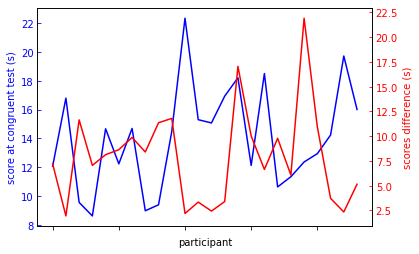

In [68]:
ax1 = df['Congruent'].plot(color='blue')
ax2 = df['Difference'].plot(color='red',secondary_y=True)
ax1.set_xlabel('participant')
ax1.set_ylabel('score at congruent test (s)', color='blue')
ax2.set_ylabel('scores difference (s)', color='red')
ax1.set_xticklabels([])
ax1.tick_params(axis='y', colors='blue', direction='in')
ax2.tick_params(axis='y', colors='red', direction='in')

The lower the time used by the participant to list the congruent colors, the greater the time difference between his incongruent/congruent colors tests.
And vice versa, the greater the time needed at the first test, the less the time difference!
This observation states that the strategy chosen for this test is maybe not the best.

---
## Conclusion
The experiment would be more robust by testing two independant samples, with higher sample sizes.
The repetitive aspect of the test, and the order of the steps as well, would not affect the results as with our paired dependent samples.

---
## References
No external references have been used for this project. Some of the techniques learnt during previous projects could be directly applied there.